In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.cm import get_cmap
import seaborn as sns
import string
import pickle # save data frame (results) in a .pkl file
import pandas as pd
from datetime import datetime
import os, sys
import re


sys.path.insert(0, 'C:/Users/User/Code/MMDGraph')
#from importlib import reload
from mmdutils import readfoldertopanda, PlotROCGeneral, plotVaryingBGDEG, findAUC
#reload(readfoldertopanda)
import importlib
importlib.reload(sys.modules['mmdutils'])
from mmdutils import readfoldertopanda, PlotROCGeneral, plotVaryingBGDEG, findAUC

In [3]:
keys = ['nr_nodes_1', 'nr_nodes_2', 'degree_1','degree_2', 'n', 'm']
params_kernel = {}
data_auc = {}
data = {}

# RW

In [28]:
data['RW'] = readfoldertopanda("../data/ScaleFree/RW")
data['RW'] = data['RW'].loc[data['RW']['N'] == 3000]
data['RW'].columns
np.unique(data['RW']['type'])

array(['ARKU_plus', 'p-rw'], dtype=object)

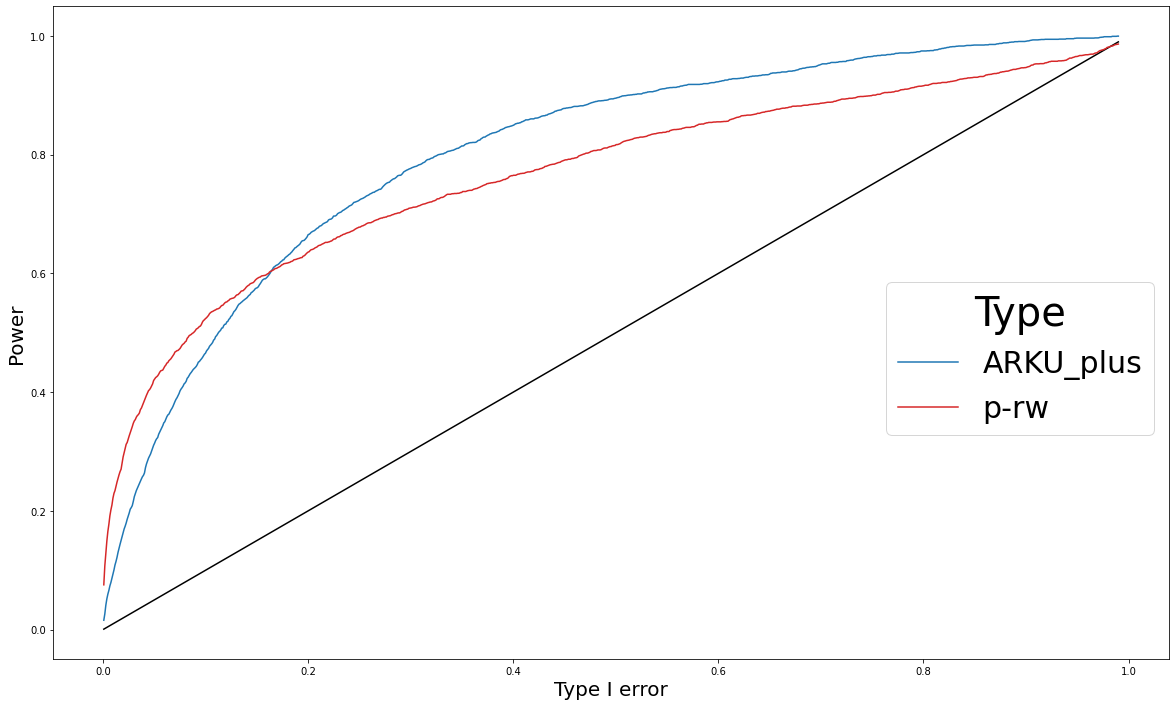

In [31]:
params_fixed = {'n':40,
                'm':40,
                'normalize':0,
                'degree_1':2.1,
                'degree_2':2.2,
                'discount':0.001,
                'r':6
                }


#data['RW'].loc[(data['RW']['tmax'] == 4) | (data['RW']['type'].isin(['ARKU_plus']))]
plotVaryingBGDEG(df =data['RW'].loc[(data['RW']['tmax'] == 20) | (data['RW']['type'].isin(['ARKU_plus']))], param_vary_name = "type", params_fixed = params_fixed, mmd_stat = "MMD_u", color_name = "tab10", disp_title=False, legend_title= 'Type')

params_kernel['RW'] = ['normalize', 'r', 'discount', 'type', 'tmax']
data_auc['RW'] = findAUC(keys = keys, params = params_kernel['RW'], stats = ['MMD_b', 'MMD_u'], df = data['RW'] )


# WL

In [33]:
data['WL'] = readfoldertopanda("../data/ScaleFree/WLsubtree")
data['WL'] = data['WL'].loc[data['WL']['N'] == 3000]
data['WL'].columns

Index(['kernel', 'alpha', 'normalize', 'nr_nodes_1', 'nr_nodes_2', 'degree_1',
       'degree_2', 'ratio_degree', 'n', 'm', 'timestap', 'B', 'N', 'run_time',
       'MMD_b', 'MMD_b_distfree', 'MMD_u', 'MMD_u_distfree', 'nitr',
       'with_labels', 'sinkhorn'],
      dtype='object')

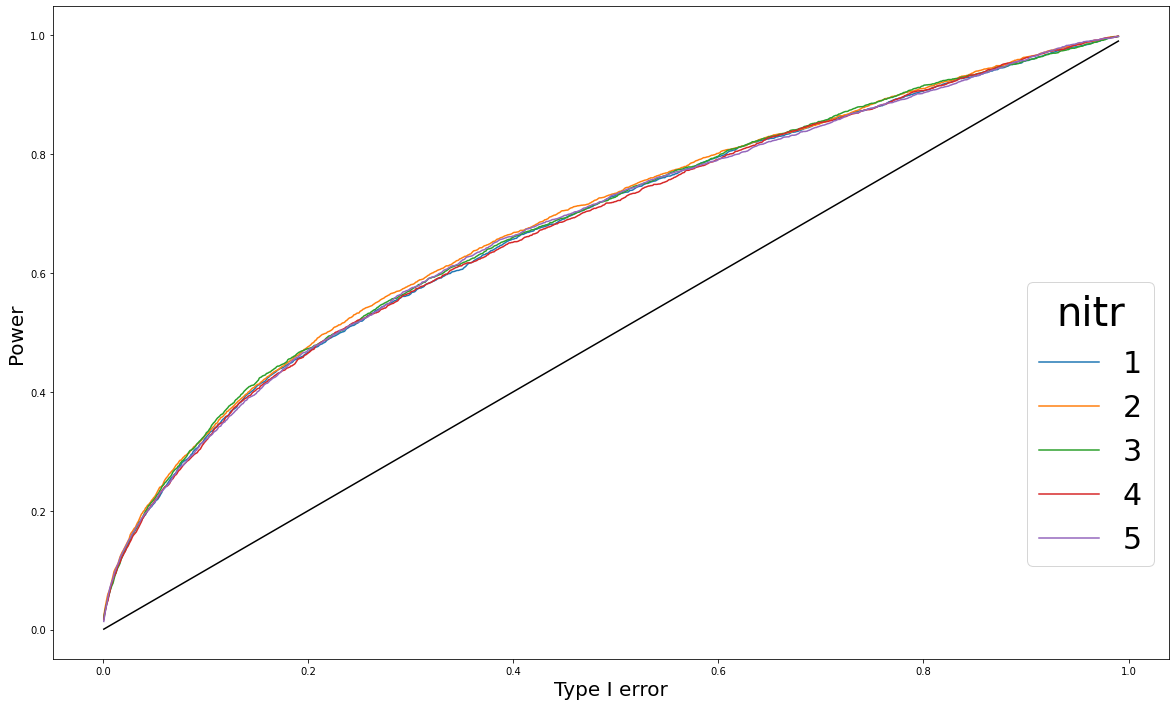

In [36]:
params_fixed = {'n':40,
                'm':40,
                'normalize':0,
                'degree_1':2.1,
                'degree_2':2.2
                }


#data['RW'].loc[(data['RW']['tmax'] == 4) | (data['RW']['type'].isin(['ARKU_plus']))]
plotVaryingBGDEG(df =data['WL'], param_vary_name = "nitr", params_fixed = params_fixed, mmd_stat = "MMD_u", color_name = "tab10", disp_title=False, legend_title= 'nitr')

params_kernel['WL'] = ['normalize', 'nitr']
data_auc['WL'] = findAUC(keys = keys, params = params_kernel['WL'], stats = ['MMD_b', 'MMD_u'], df = data['WL'] )


# WLOA

In [37]:
data['WLOA'] = readfoldertopanda("../data/ScaleFree/WLOA")
data['WLOA'] = data['WLOA'].loc[data['WLOA']['N'] == 3000]
data['WLOA'].columns

Index(['kernel', 'alpha', 'normalize', 'nr_nodes_1', 'nr_nodes_2', 'degree_1',
       'degree_2', 'ratio_degree', 'n', 'm', 'timestap', 'B', 'N', 'run_time',
       'MMD_b', 'MMD_b_distfree', 'MMD_u', 'MMD_u_distfree', 'nitr',
       'with_labels', 'sinkhorn'],
      dtype='object')

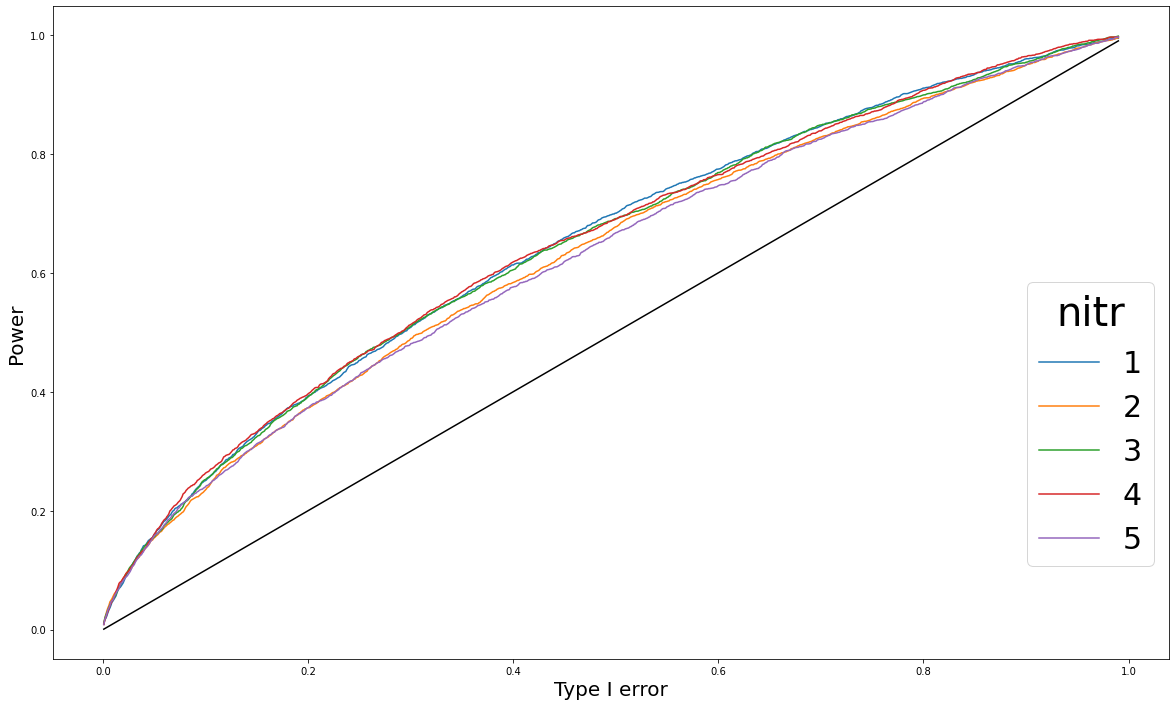

In [38]:
params_fixed = {'n':40,
                'm':40,
                'normalize':0,
                'degree_1':2.1,
                'degree_2':2.2
                }


#data['RW'].loc[(data['RW']['tmax'] == 4) | (data['RW']['type'].isin(['ARKU_plus']))]
plotVaryingBGDEG(df =data['WLOA'], param_vary_name = "nitr", params_fixed = params_fixed, mmd_stat = "MMD_u", color_name = "tab10", disp_title=False, legend_title= 'nitr')

params_kernel['WLOA'] = ['normalize', 'nitr']
data_auc['WLOA'] = findAUC(keys = keys, params = params_kernel['WLOA'], stats = ['MMD_b', 'MMD_u'], df = data['WLOA'] )


# WWL

In [41]:
data['WWL'] = readfoldertopanda("../data/ScaleFree/WWL")
# data['WWL'] = data['WWL'].loc[data['WWL']['N'] == 3000]
data['WWL'].columns

ValueError: No objects to concatenate

In [39]:
params_fixed = {'n':20,
                'm':20,
                'normalize':0,
                'discount':0.01,
                #'nitr':4
                }


plotVaryingBGDEG(df = data['WWL'].copy(), param_vary_name = "nitr", params_fixed = params_fixed, mmd_stat = "MMD_u", color_name = "tab10", disp_title=False, legend_title= 'Nr. WL iterations')


params_kernel['WWL'] = [ 'normalize', 'nitr', 'discount', 'sinkhorn']
data_auc['WWL']  = findAUC(keys = keys, params = params_kernel['WWL'], stats = ['MMD_b', 'MMD_u'], df = data['WWL'] )

KeyError: 'WWL'

# VH

In [45]:
data['VH'] = readfoldertopanda("../data/ScaleFree/VH")
# data['VH'] = data['VH'].loc[data['VH']['N'] == 3000]
data['VH'].columns

Index(['kernel', 'alpha', 'normalize', 'nr_nodes_1', 'nr_nodes_2', 'degree_1',
       'degree_2', 'ratio_degree', 'n', 'm', 'timestap', 'B', 'N', 'run_time',
       'MMD_b', 'MMD_b_distfree', 'MMD_u', 'MMD_u_distfree', 'with_labels',
       'sinkhorn'],
      dtype='object')

C:/Users/User/Code/MMDGraph\mmdutils.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[param_vary_name].fillna(value=99999, inplace=True)


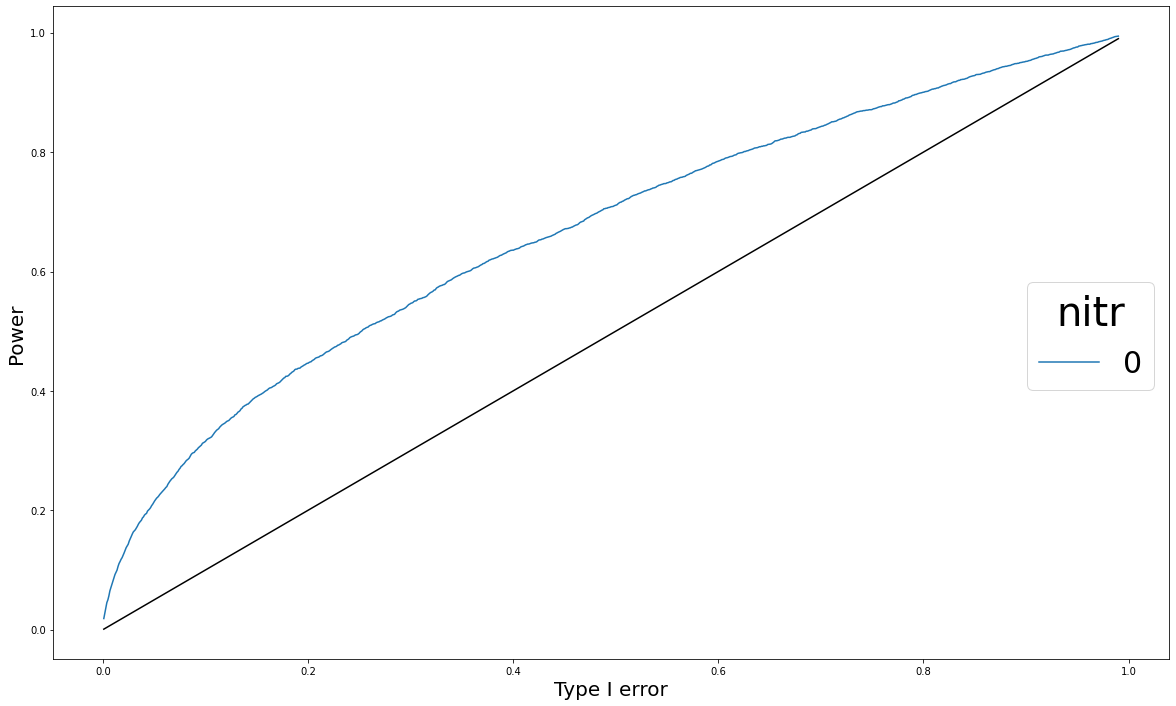

In [47]:
params_fixed = {'n':40,
                'm':40,
                'normalize':0,
                'degree_1':2.1,
                'degree_2':2.2
                }


#data['RW'].loc[(data['RW']['tmax'] == 4) | (data['RW']['type'].isin(['ARKU_plus']))]
plotVaryingBGDEG(df =data['VH'], param_vary_name = "normalize", params_fixed = params_fixed, mmd_stat = "MMD_u", color_name = "tab10", disp_title=False, legend_title= 'nitr')

params_kernel['VH'] = ['normalize']
data_auc['VH'] = findAUC(keys = keys, params = params_kernel['VH'], stats = ['MMD_b', 'MMD_u'], df = data['VH'] )


# SP

In [50]:
data['SP'] = readfoldertopanda("../data/ScaleFree/SP")
# data['SP'] = data['SP'].loc[data['SP']['N'] == 3000]
data['SP'].columns

Index(['kernel', 'alpha', 'normalize', 'nr_nodes_1', 'nr_nodes_2', 'degree_1',
       'degree_2', 'ratio_degree', 'n', 'm', 'timestap', 'B', 'N', 'run_time',
       'MMD_b', 'MMD_b_distfree', 'MMD_u', 'MMD_u_distfree', 'with_labels',
       'sinkhorn'],
      dtype='object')

C:/Users/User/Code/MMDGraph\mmdutils.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[param_vary_name].fillna(value=99999, inplace=True)


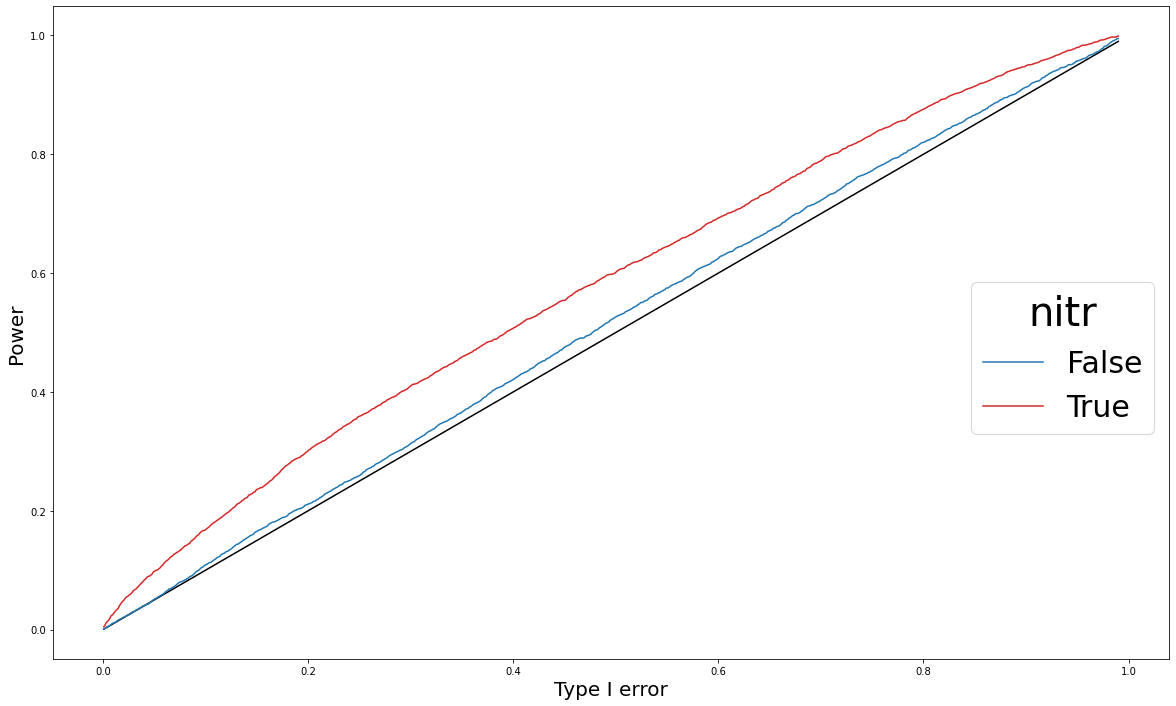

In [66]:
params_fixed = {'n':40,
                'm':40,
                'normalize':0,
                'degree_1':2.1,
                'degree_2':2.2
                }


#data['RW'].loc[(data['RW']['tmax'] == 4) | (data['RW']['type'].isin(['ARKU_plus']))]
plotVaryingBGDEG(df =data['SP'], param_vary_name = "with_labels", params_fixed = params_fixed, mmd_stat = "MMD_u", color_name = "tab10", disp_title=False, legend_title= 'nitr')

params_kernel['SP'] = ['normalize', 'with_labels']
data_auc['SP'] = findAUC(keys = keys, params = params_kernel['SP'], stats = ['MMD_b', 'MMD_u'], df = data['SP'] )


# PYRAMID

In [54]:
data['PYRAMID'] = readfoldertopanda("../data/ScaleFree/PYRAMID")
# data['SP'] = data['SP'].loc[data['SP']['N'] == 3000]
data['PYRAMID'].columns

Index(['kernel', 'alpha', 'normalize', 'nr_nodes_1', 'nr_nodes_2', 'degree_1',
       'degree_2', 'ratio_degree', 'n', 'm', 'timestap', 'B', 'N', 'run_time',
       'MMD_b', 'MMD_b_distfree', 'MMD_u', 'MMD_u_distfree', 'with_labels',
       'L', 'dim', 'sinkhorn'],
      dtype='object')

C:/Users/User/Code/MMDGraph\mmdutils.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[param_vary_name].fillna(value=99999, inplace=True)


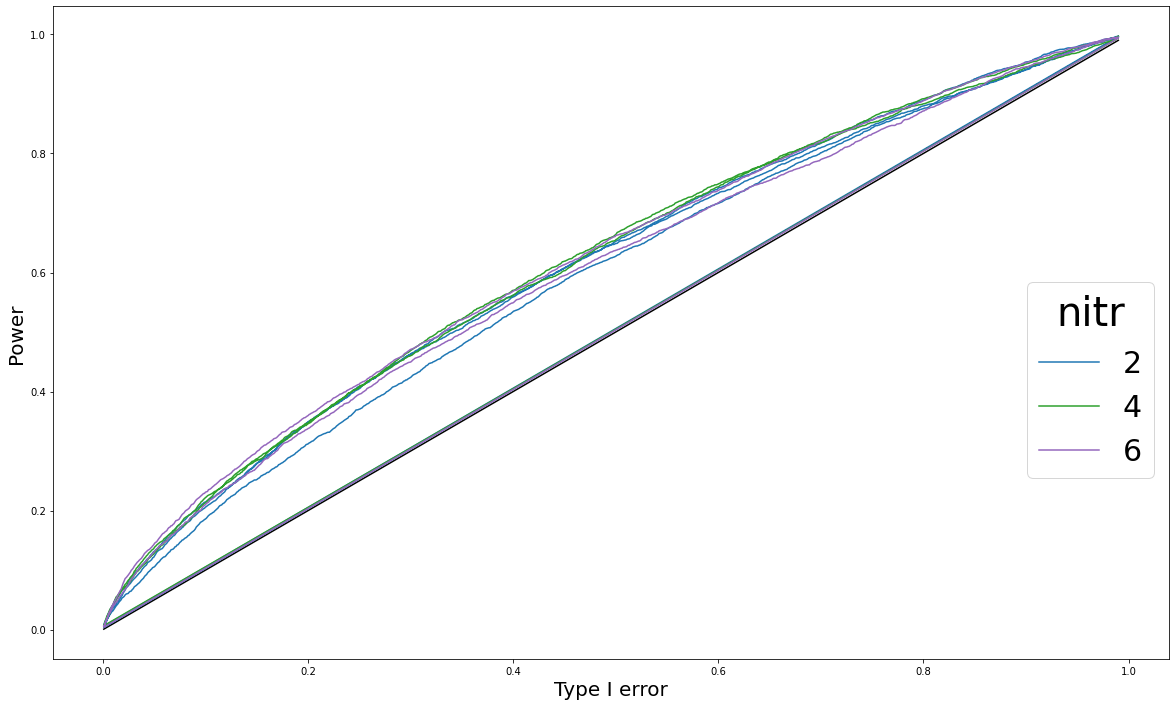

In [64]:
params_fixed = {'n':40,
                'm':40,
                'normalize':0,
                'degree_1':2.1,
                'degree_2':2.2,
                 #'dim':2,
                'with_labels':False
                #'L':8
                }


#data['RW'].loc[(data['RW']['tmax'] == 4) | (data['RW']['type'].isin(['ARKU_plus']))]
plotVaryingBGDEG(df =data['PYRAMID'], param_vary_name = "dim", params_fixed = params_fixed, mmd_stat = "MMD_u", color_name = "tab10", disp_title=False, legend_title= 'nitr')

params_kernel['PYRAMID'] = ['normalize', 'dim', 'L', 'with_labels']
data_auc['PYRAMID'] = findAUC(keys = keys, params = params_kernel['PYRAMID'], stats = ['MMD_b', 'MMD_u'], df = data['PYRAMID'] )


# PROP

In [71]:
data['PROP'] = readfoldertopanda("../data/ScaleFree/PROP")
# data['PROP'] = data['PROP'].loc[data['PROP']['N'] == 3000]
data['PROP'].columns
np.unique(data['PROP']['w'])

array([0.0001, 0.001 , 0.01  ])

C:/Users/User/Code/MMDGraph\mmdutils.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[param_vary_name].fillna(value=99999, inplace=True)


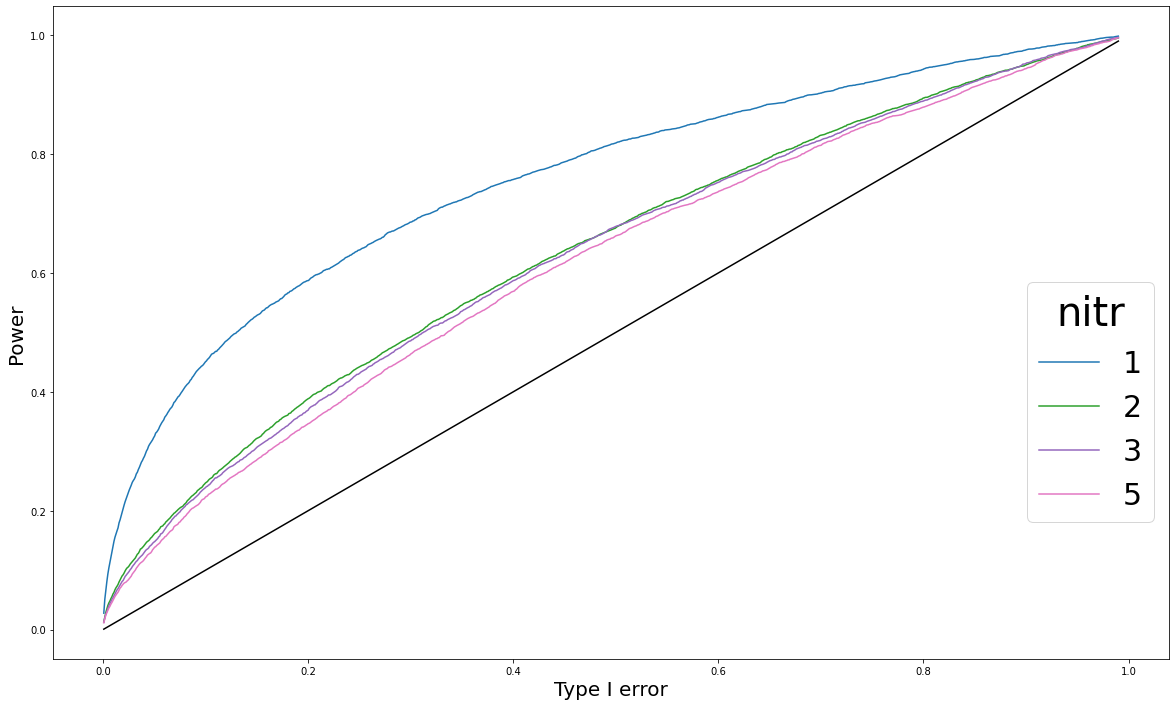

In [75]:
params_fixed = {'n':50,
                'm':50,
                'normalize':0,
                'degree_1':2.1,
                'degree_2':2.2,
                'w':0.01
                }


#data['RW'].loc[(data['RW']['tmax'] == 4) | (data['RW']['type'].isin(['ARKU_plus']))]
plotVaryingBGDEG(df =data['PROP'], param_vary_name = "tmax", params_fixed = params_fixed, mmd_stat = "MMD_u", color_name = "tab10", disp_title=False, legend_title= 'nitr')

params_kernel['PROP'] = ['normalize', 'w', 'tmax', 'M']
data_auc['PROP'] = findAUC(keys = keys, params = params_kernel['PROP'], stats = ['MMD_b', 'MMD_u'], df = data['PROP'] )


# ODD

In [79]:
data['ODD'] = readfoldertopanda("../data/ScaleFree/ODD")
data['ODD'] = data['ODD'].loc[data['ODD']['N'] == 3000]
data['ODD'].columns
data['ODD']['dagh'] = data['ODD']['dagh'].astype(str)
data['ODD']['dagh'].loc[data['ODD']['dagh'] == 'nan'] = 'No limit'

C:\Users\User\AppData\Local\Temp\ipykernel_18232\240386673.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ODD']['dagh'].loc[data['ODD']['dagh'] == 'nan'] = 'No limit'


In [81]:
np.unique(data['ODD']['dagh'])

array(['3.0', 'No limit'], dtype=object)

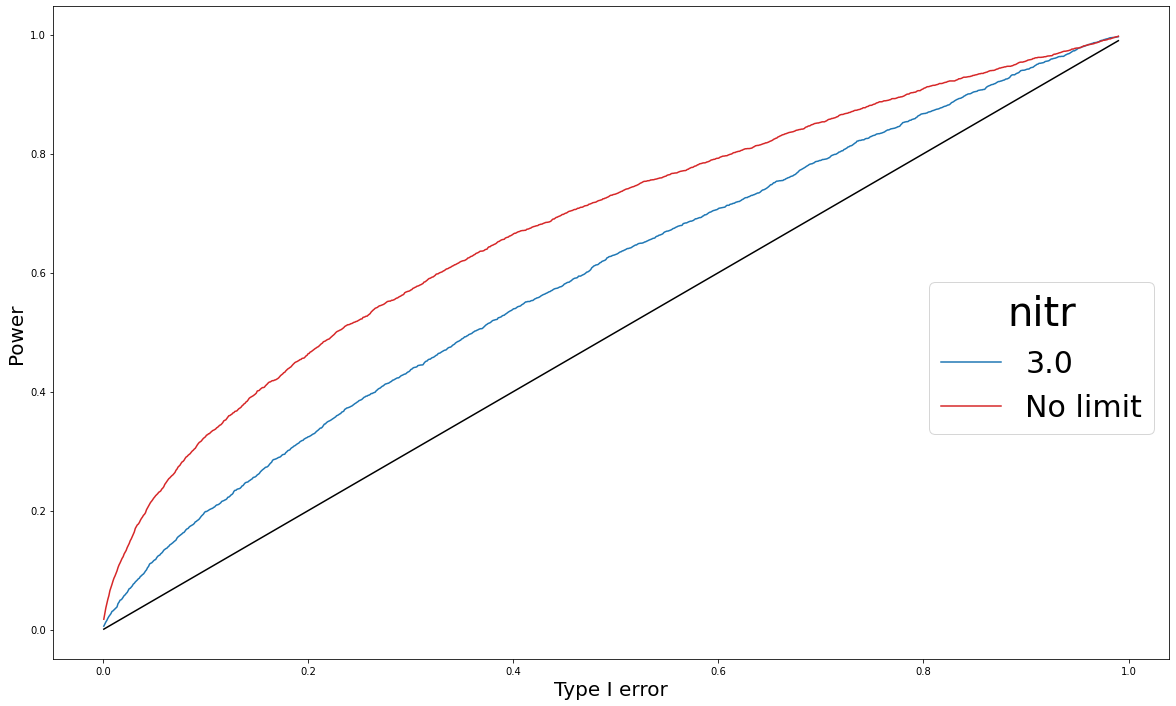

In [83]:
params_fixed = {'n':40,
                'm':40,
                'normalize':0,
                'degree_1':2.1,
                'degree_2':2.2
                }


#data['RW'].loc[(data['RW']['tmax'] == 4) | (data['RW']['type'].isin(['ARKU_plus']))]
plotVaryingBGDEG(df =data['ODD'], param_vary_name = "dagh", params_fixed = params_fixed, mmd_stat = "MMD_u", color_name = "tab10", disp_title=False, legend_title= 'nitr')

params_kernel['ODD'] = ['normalize', 'dagh']
data_auc['ODD'] = findAUC(keys = keys, params = params_kernel['ODD'], stats = ['MMD_b', 'MMD_u'], df = data['ODD'] )


# GRAPHSTATS

In [84]:
data['GRAPHSTATS'] = readfoldertopanda("../data/ScaleFree/GRAPHSTATS")
# data['ODD'] = data['ODD'].loc[data['ODD']['N'] == 3000]
data['GRAPHSTATS'].columns


ValueError: No objects to concatenate

# GNTK

In [87]:
data['GNTK'] = readfoldertopanda("../data/ScaleFree/GNTK")
# data['ODD'] = data['ODD'].loc[data['ODD']['N'] == 3000]
data['GNTK'].columns

data['GNTK']['L+R'] = data['GNTK']['L'].astype(str) + "-" +data['GNTK']['dim'].astype(str)


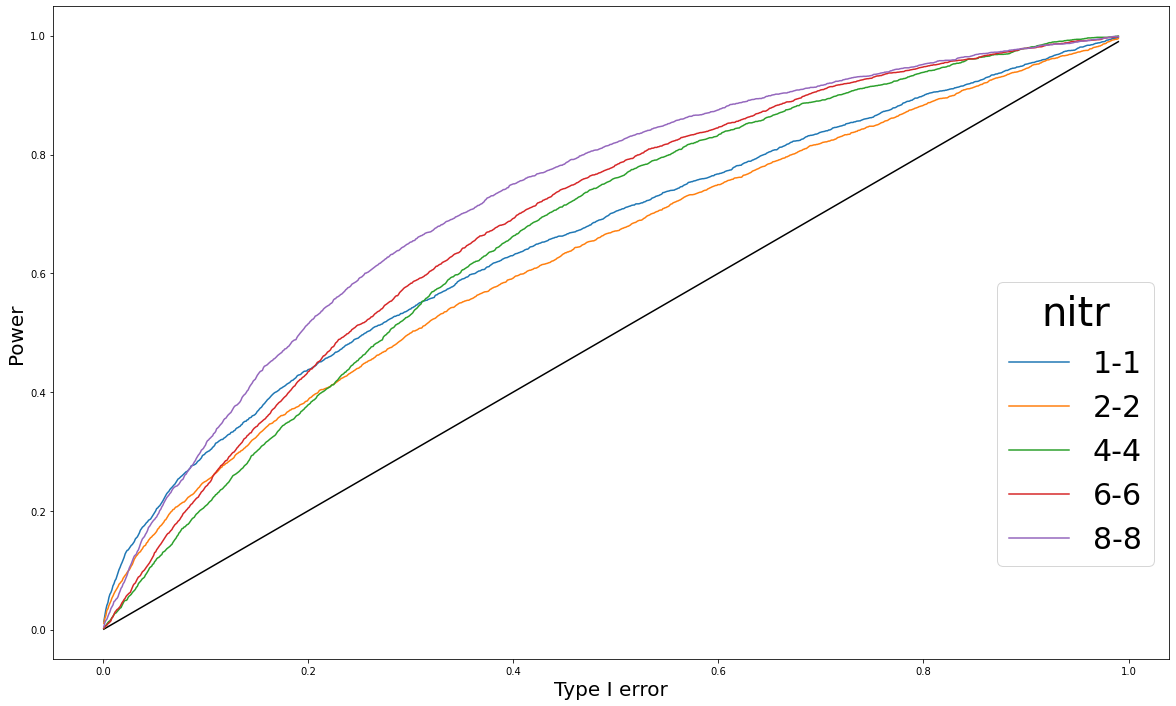

In [89]:
params_fixed = {'n':40,
                'm':40,
                'normalize':0,
                'degree_1':2.1,
                'degree_2':2.2
                }


#data['RW'].loc[(data['RW']['tmax'] == 4) | (data['RW']['type'].isin(['ARKU_plus']))]
plotVaryingBGDEG(df =data['GNTK'], param_vary_name = 'L+R', params_fixed = params_fixed, mmd_stat = "MMD_u", color_name = "tab10", disp_title=False, legend_title= 'nitr')

params_kernel['GNTK'] = ['normalize', 'dim', 'L']
data_auc['GNTK'] = findAUC(keys = keys, params = params_kernel['GNTK'], stats = ['MMD_b', 'MMD_u'], df = data['GNTK'] )


# DK

In [90]:
data['DK'] = readfoldertopanda("../data/ScaleFree/DK")
# data['ODD'] = data['ODD'].loc[data['ODD']['N'] == 3000]
data['DK'].columns



Index(['kernel', 'alpha', 'normalize', 'nr_nodes_1', 'nr_nodes_2', 'degree_1',
       'degree_2', 'ratio_degree', 'n', 'm', 'timestap', 'B', 'N', 'run_time',
       'MMD_b', 'MMD_b_distfree', 'MMD_u', 'MMD_u_distfree', 'nitr',
       'with_labels', 'type', 'sinkhorn'],
      dtype='object')

C:/Users/User/Code/MMDGraph\mmdutils.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[param_vary_name].fillna(value=99999, inplace=True)


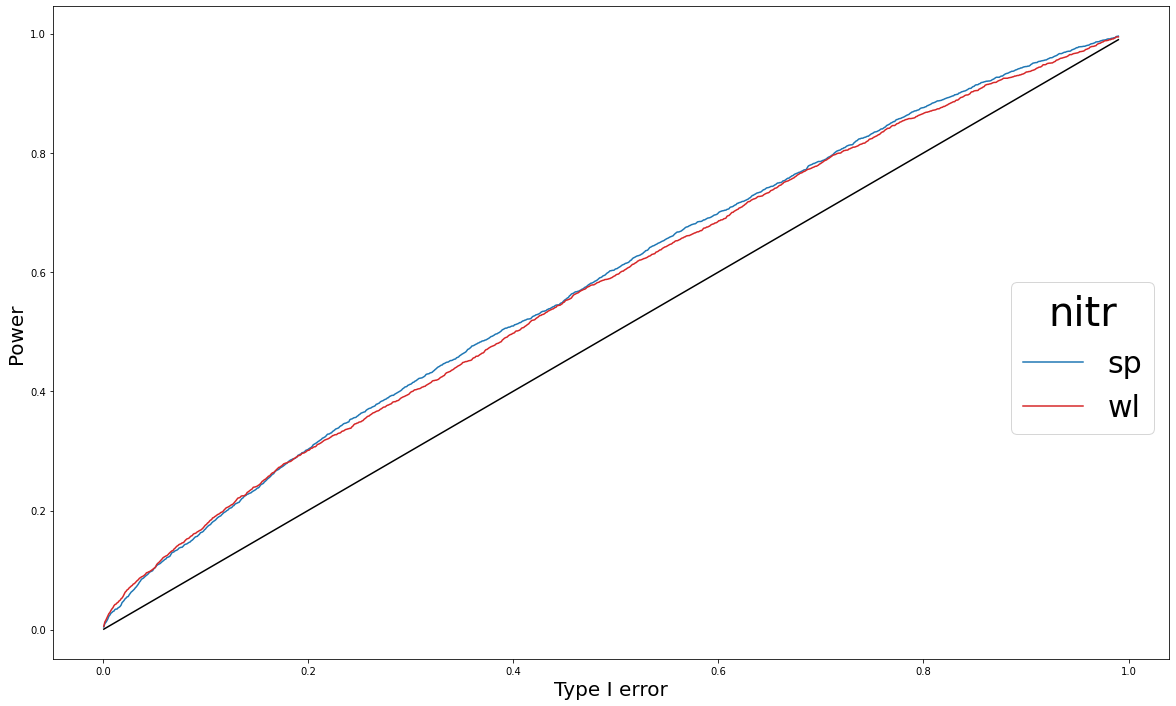

In [96]:
params_fixed = {'n':40,
                'm':40,
                'normalize':0,
                'degree_1':2.1,
                'degree_2':2.2
                }


#data['RW'].loc[(data['RW']['tmax'] == 4) | (data['RW']['type'].isin(['ARKU_plus']))]
plotVaryingBGDEG(df =data['DK'].loc[(data['DK']['nitr'] == 4) | (data['DK']['type'].isin(['sp']))], param_vary_name = 'type', params_fixed = params_fixed, mmd_stat = "MMD_u", color_name = "tab10", disp_title=False, legend_title= 'nitr')

params_kernel['DK'] = ['normalize', 'type']
data_auc['DK'] = findAUC(keys = keys, params = params_kernel['DK'], stats = ['MMD_b', 'MMD_u'], df = data['DK'] )


# ALL

In [101]:

key_pair = pd.DataFrame({'n':40,
                'm':40,
                'degree_1':2.1,
                'degree_2':2.2,
                'nr_nodes_1': 80,
                'nr_nodes_2': 80
                
                },
                 index = [0])

                # 'probs_1':'[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0.07 0.2 ]]', 
                # 'probs_2':'[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0.07 0.2 ]]', 
                # 'sizes_1':'[30, 20, 25]',
                # 'sizes_2':'[30, 20, 25]',

stat = 'MMD_u_auc'
stat_plot = 'MMD_u'

best = []

for k,v in data.items():
    if np.isin(k, ['PROP']):
        continue
    print(k)

    k_data_max = data_auc[k].reset_index().merge(key_pair, on = keys)
    k_data_max = k_data_max[k_data_max.groupby(keys)[stat].transform(max) == k_data_max[stat]].iloc[[0]]
    tmp_data = v.reset_index().merge(k_data_max, on = keys + params_kernel[k])
    tmp_data['kernel_name'] = k
    best.append(tmp_data)


RW
WL
WLOA
VH
SP
PYRAMID
ODD
GNTK
DK


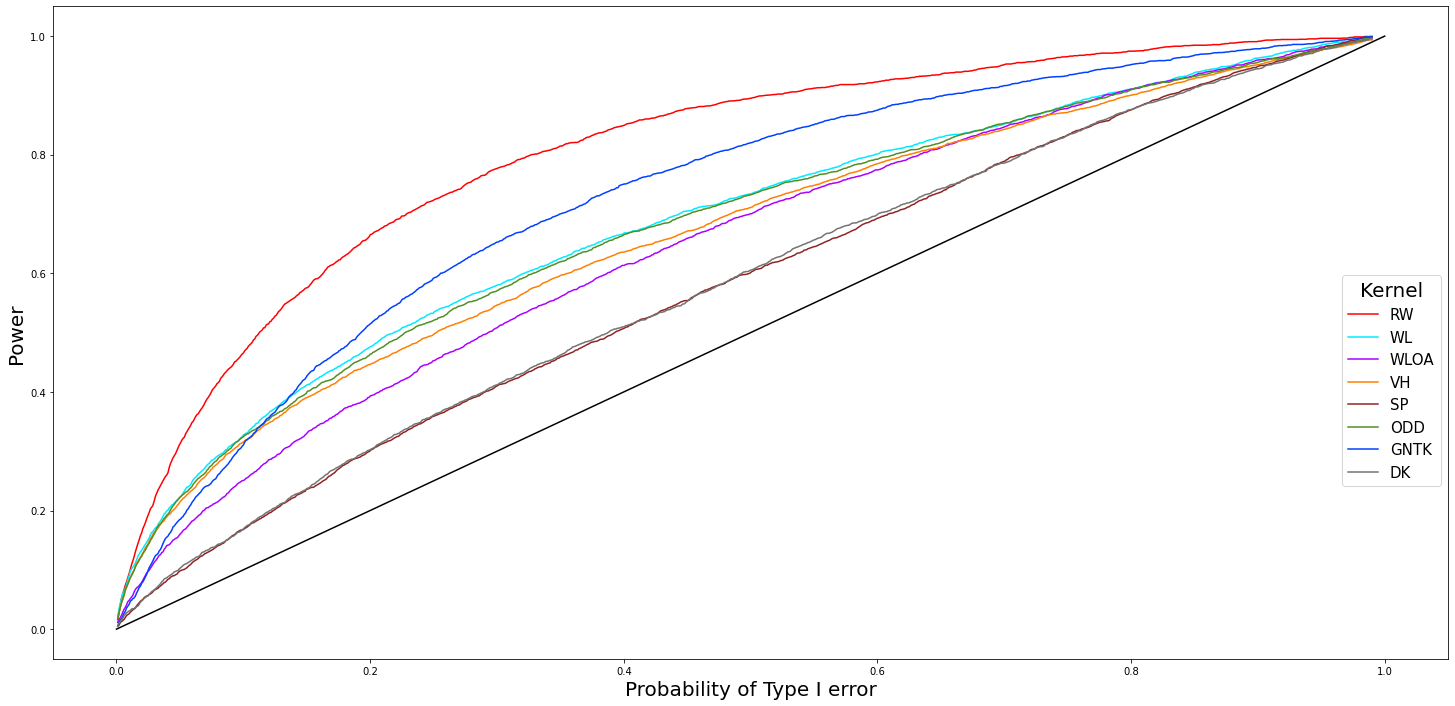

In [102]:
_, ax = plt.subplots(figsize = (25,12))


label = []
#icefire
#cmap = get_cmap(sns.color_palette("viridis", as_cmap=True)) # type: matplotlib.colors.ListedColormap
colors = ['#FF0000',  '#00EAFF', '#AA00FF', '#FF7F00', '#8F2323', '#8F6A23', '#4F8F23', '#0040FF', '#737373', '#23628F']# cmap.colors[::int(len(cmap.colors)/(7+1))]  # type: list

for i,row in enumerate(best):

    if str(row['kernel_name'].iloc[0]) == 'PYRAMID':
        continue

    ax.plot(row['alpha'], row[stat_plot], color =colors[i], label=str(row['kernel_name'].iloc[0]))
    label.append(str(row['kernel_name'].iloc[0]))

ax.plot([0,1], [0,1], color = 'black')
# ax.plot(graph_stat['alpha'], graph_stat['average_degree'], color =colors[i+1], label='average_degree')
# label.append('average_degree')



h, l = ax.get_legend_handles_labels()

ax.legend(handles=h, labels=label, 
        handler_map = {tuple: matplotlib.legend_handler.HandlerTuple(None)}, title = 'Kernel', bbox_to_anchor=(1, 0.6), fontsize = 15, title_fontsize=20)

ax.set_xlabel('Probability of Type I error', fontsize = 20)
ax.set_ylabel('Power', fontsize = 20)
# ax.set_title(f'Number of samples = {key_pair["n"].iloc[0]}, Noise = {key_pair["noise"].iloc[0]}', fontsize = 20)



plt.show()